In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from strategy_implementation import *

df = pd.read_csv("TSLA_weekly_return_volatility.csv")
df_18 = df.loc[df["Year"] == 2018].reset_index()
df_19 = df.loc[df["Year"] == 2019].reset_index()

### 1.  Plot your error rates and find the best combination of N and d.

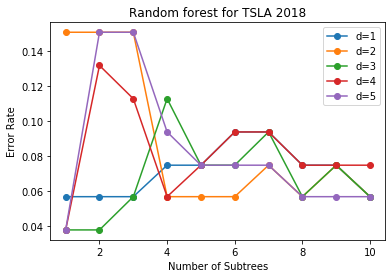

In [2]:
# data
X_train = df_18[["mean_return", "volatility"]].values
Y_train = df_18["label"].values
X_test = df_19[["mean_return", "volatility"]].values
Y_test = df_19["label"].values

# N - number of (sub)trees to use (1-10)
# d - max depth of each subtree (1-5)
N = [ n for n in range(1,11)]
D = [ d for d in range(1,6)]

# define the model
error_lists = []
for d in D:
    error_rates = []
    for n in N:
        rfc = RandomForestClassifier(n_estimators=n, max_depth=d, criterion="entropy", random_state = 0)
        rfc.fit(X_train, Y_train)
        y_predict = rfc.predict(X_test)
        error_rate = round(np.mean(y_predict != Y_test),3)
        error_rates.append(error_rate)
    error_lists.append(error_rates)
    
plt.plot(N, error_lists[0], marker="o", label="d=1")
plt.plot(N, error_lists[1], marker="o", label="d=2")
plt.plot(N, error_lists[2], marker="o", label="d=3")
plt.plot(N, error_lists[3], marker="o", label="d=4")
plt.plot(N, error_lists[4], marker="o", label="d=5")
plt.legend()
plt.title("Random forest for TSLA 2018")
plt.xlabel("Number of Subtrees")
plt.ylabel("Error Rate")
plt.show()

### 2. Find the optimal value from 2018, compute confusion matrix for 2019

In [3]:
min_errors = [min(e) for e in error_lists]
min_error = min(min_errors)
min_loc = np.argwhere(error_lists == min_error)
opt_n = min_loc[0][0] + 1 # index + 1
opt_d = min_loc[0][1] + 1
opt_rfc = RandomForestClassifier(n_estimators=opt_n, max_depth=opt_d, criterion="entropy", random_state=0)
opt_rfc.fit(X_train, Y_train)
opt_y_predict = rfc.predict(X_test)
cf_matrix = confusion_matrix(Y_test, opt_y_predict)
print("The confusion matrix for 2019: \n", cf_matrix)

The confusion matrix for 2019: 
 [[22  2]
 [ 1 28]]


### 3. True positive rate and true negative rate

In [4]:
true_positive_rate = cf_matrix[1][1] / (cf_matrix[0][1] + cf_matrix[1][1])
true_negative_rate = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[1][0])
print(f"The true positive rate is {round(true_positive_rate, 2)} \
and the true negative rate is {round(true_negative_rate, 2)}.")

The true positive rate is 0.93 and the true negative rate is 0.96.


### 4. Implement a trading strategy

In [5]:
df_trade = pd.read_csv("Trade_18_19.csv")
df_trade_19 = df_trade.loc[df_trade["Year"] == 2019].reset_index()
invest = 100

# decision tree
green_week_index = green_week(opt_y_predict)
df_implement = profit_loss_balance(df_trade_19, invest, green_week_index)
RF_final_value = final_balance(df_implement)
print("The final value of balance with strategy implementation is", RF_final_value)

The final value of balance with strategy implementation is 457.87


In [6]:
# original label 
green_week_orginal = Y_test.tolist()
green_week_original_index = green_week(green_week_orginal)
df_original = profit_loss_balance(df_trade_19, invest, green_week_original_index)
original_final_value = final_balance(df_original)
print("The final value of balance with the label strategy is", original_final_value)

The final value of balance with the label strategy is 456.7


In [7]:
# buy-and-hold strategy
adj_close = df_trade_19["Adj Close"].values
buy_in_price = adj_close[0]
close_price = adj_close[-1]
buy_hold_final_value = buy_hold(invest, buy_in_price, close_price)
print("The final value of balance with the buy-and-hold strategy is", buy_hold_final_value)

The final value of balance with the buy-and-hold strategy is 134.89


The random forest implementation results in a similiar or even higher final value than the original label strategy.